<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate rectangle detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# # Specify device
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "" 

In [ ]:
 # dynamically grow the memory used on the GPU
from tensorflow.compat.v1.keras.backend import set_session
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
sess = tf.compat.v1.Session(config=config)
set_session(sess)

In [2]:
# Import all necessary libraries.
import os
import numpy as np
import glob
import sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters, RectDetector

In [4]:
# Import license plate recognition tools.
from NomeroffNet import  Detector
from NomeroffNet import  filters
from NomeroffNet import  RectDetector

# load models
rectDetector = RectDetector()

nnet = Detector()
nnet.loadModel(NOMEROFF_NET_DIR)

Config '/mnt/storage2/var/www/nomeroff-net/./NomeroffNet/configs/centermask2/numberplates/cpu_centermask_numberplate_V_39_eSE_FPN_ms_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


/mnt/storage2/var/www/nomeroff-net/centermask2/centermask/modeling/fcos/fcos_outputs.py:402: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  per_candidate_nonzeros = per_candidate_inds.nonzero()
/usr/local/lib64/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib64/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


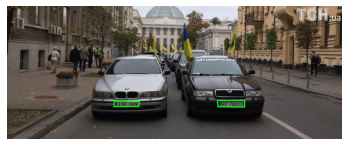

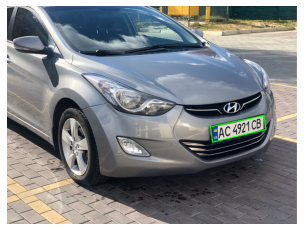

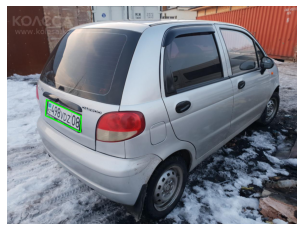

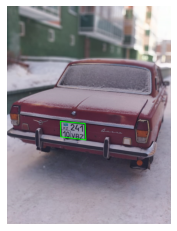

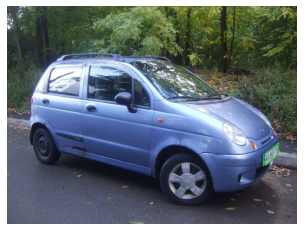

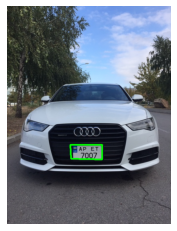

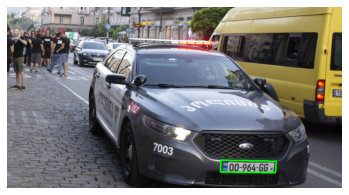

In [5]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/*'

imgs = [mpimg.imread(img_path) for img_path in glob.glob(rootDir)]
        
cv_imgs_masks = nnet.detect_mask(imgs)

for img, cv_img_masks in zip(imgs, cv_imgs_masks):    
    # Detect points.
    arrPoints = rectDetector.detect(cv_img_masks)

    filters.draw_box(img, arrPoints, (0, 255, 0), 3)
    plt.axis("off")
    plt.imshow(img)
    plt.show()